In [2]:
from keras.models import load_model
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
model_path = '/Users/parsa/Desktop/trained_model_final2'
model = load_model(model_path)

In [4]:
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255, validation_split=0.22)

target_size = (224, 224)
batch_size = 32

train_generator = datagen_train.flow_from_directory(
    '/Users/parsa/Desktop/Food',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen_val.flow_from_directory(
    '/Users/parsa/Desktop/Food',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 161 images belonging to 9 classes.
Found 33 images belonging to 9 classes.


1/1 [==============================] - 0s 219ms/step


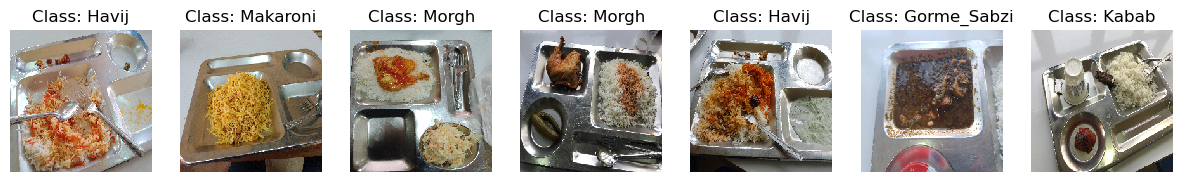

In [10]:
batch = val_generator.next()
images, _ = batch

predictions = model.predict(images)

class_names = val_generator.class_indices
class_names = {v: k for k, v in class_names.items()}


num_images_to_display = 7

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5)) 

for i in range(num_images_to_display):
    axes[i].imshow(images[i], interpolation='nearest')  
    axes[i].set_title(f"Class: {class_names[np.argmax(predictions[i])]}")
    axes[i].axis('off')

plt.show()

1/1 [==============================] - 0s 231ms/step


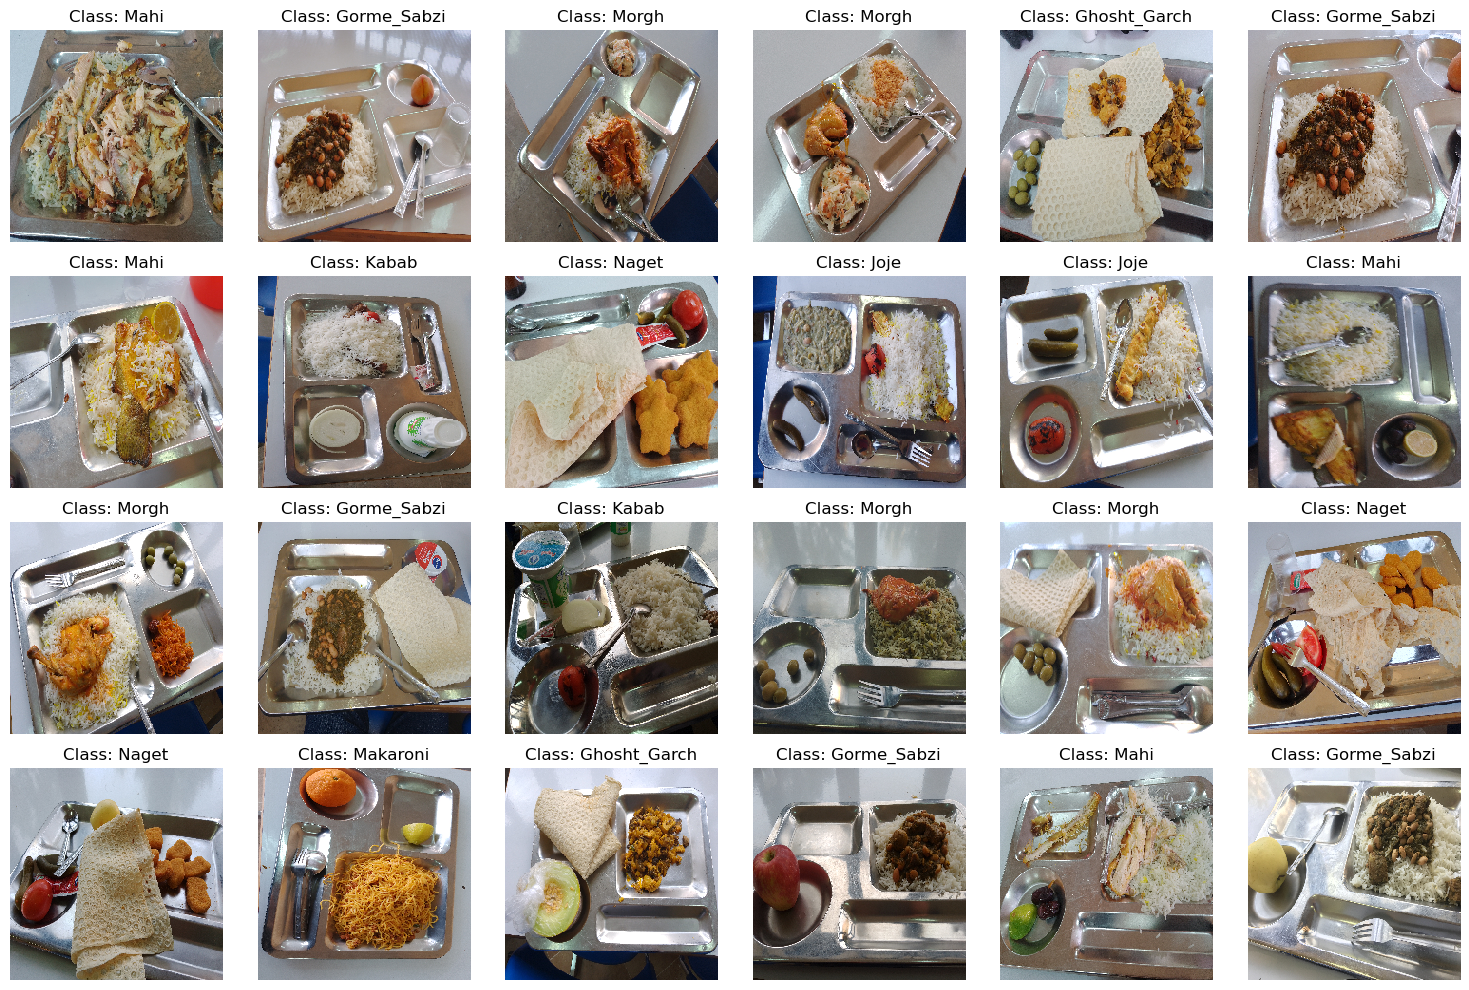

In [6]:
batch = train_generator.next()
images, labels = batch
predictions = model.predict(images)


fig, axes = plt.subplots(4, 6, figsize=(15, 10))  

for i in range(4):
    for j in range(6):
        index = i * 6 + j
        axes[i, j].imshow(images[index], interpolation='nearest')
        axes[i, j].set_title(f"Class: {class_names[np.argmax(predictions[index])]}")
        axes[i, j].axis('off') 

plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image



img = image.load_img('/Users/parsa/Desktop/‌140.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)/255.0


predictions = model.predict(img_array)

predicted_class = class_names[np.argmax(predictions[0])]
confidence = predictions[0][np.argmax(predictions[0])]

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2%}")

1/1 [==============================] - 0s 23ms/step
Predicted Class: Joje
Confidence: 98.56%


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 9)                 2

1/1 [==============================] - 0s 250ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



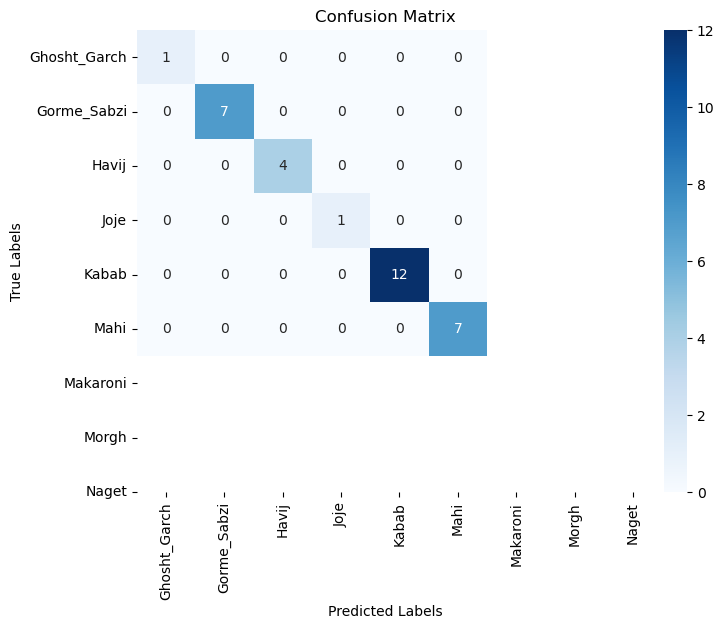

In [12]:
images, true_labels = train_generator.next()
predictions = model.predict(images)
predictedLabels = np.argmax(predictions, axis=1)

array_true_labels = np.argmax(true_labels, axis=1)

conf_matrix = confusion_matrix(array_true_labels, predictedLabels)
class_report = classification_report(array_true_labels, predictedLabels)

print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()